# Cross Validation using KNN

#### **The idea is to estimate likely performance of a model on out-of-sample data, basically we using same data but different in splitting and testing the data.

## Importing Libraries

In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import pandas as pd

#### We're gonna using Iris Dataset where classifing classes by its feature such width and height on both sepal and petal data.

In [24]:
df = pd.read_csv('Iris.csv',index_col=0)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('Species',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

#### *Fit into scaller except the species column

In [26]:
scaled_features = scaler.transform(df.drop('Species',axis=1))

#### *Create a new data frame from scaled value, include all column but the last one

In [27]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])

In [28]:
df_feat.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


#### *Prepare split train/test

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X = df_feat
y = df['Species']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9777777777777777


## Visualization of Cross Validation

#### *We tested a bunch of split of train/split, and calculate for each metrics which best result

## Step for K-fold cross-validation

1. Split the dataset into K **equal** partitions (or "folds").
2. Use fold 1 as the **testing set** and the union of the other folds as the **training set**.
3. Calculate **testing accuracy**.
4. Repeat steps 2 and 3 K times, using a **different fold** as the testing set each time.
5. Use the **average testing accuracy** as the estimate of out-of-sample accuracy.

In [35]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=False).split(range(25))

print('{} {:^61} {}'.format('Iteration', 'Training set observations', 'Testing set observations'))
for iteration, data in enumerate(kf, start=1):
    print('{:^9} {} {:^25}'.format(iteration, data[0], str(data[1])))

Iteration                   Training set observations                   Testing set observations
    1     [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [0 1 2 3 4]       
    2     [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [5 6 7 8 9]       
    3     [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24]     [10 11 12 13 14]     
    4     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24]     [15 16 17 18 19]     
    5     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]     [20 21 22 23 24]     


#### * we have 5-fold cross-valudation, thus it runs for 5 iterations, details could be seen in diagram below : 

![5-fold cross-validation](kfold.png)

#### *as we could conclude that K-fold cross validation use data split train/test more efficiently since all observation do train/testing procedure, and choose the best model.

## Begin cross validation initialization

In [39]:
from sklearn.model_selection import cross_val_score

In [40]:
knn = KNeighborsClassifier(n_neighbors = 5)
scores = cross_val_score(knn,X,y, cv=10, scoring='accuracy')

In [41]:
print(scores)

[1.         0.93333333 1.         0.93333333 0.86666667 0.93333333
 0.86666667 1.         1.         1.        ]


In [43]:
print(scores.mean())

0.9533333333333334


### Choosing Best K Value for Cross Validation

In [45]:
k_range = range(1, 50)
k_scores = []

for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn,X,y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

In [46]:
print(k_scores)

[0.9533333333333334, 0.9533333333333334, 0.9533333333333334, 0.9466666666666667, 0.9533333333333334, 0.9666666666666666, 0.9533333333333334, 0.9666666666666668, 0.9533333333333334, 0.96, 0.9466666666666667, 0.9466666666666667, 0.9533333333333334, 0.96, 0.96, 0.9666666666666666, 0.9466666666666667, 0.9533333333333334, 0.9400000000000001, 0.9466666666666667, 0.9400000000000001, 0.9533333333333334, 0.9466666666666667, 0.9466666666666667, 0.9466666666666667, 0.9466666666666667, 0.9466666666666667, 0.9466666666666667, 0.9466666666666667, 0.9400000000000001, 0.9466666666666667, 0.9400000000000001, 0.9333333333333333, 0.9133333333333333, 0.9133333333333333, 0.9, 0.9066666666666666, 0.9, 0.9, 0.8866666666666667, 0.8933333333333333, 0.8933333333333333, 0.8933333333333333, 0.8866666666666667, 0.8933333333333333, 0.8800000000000001, 0.8800000000000001, 0.8800000000000001, 0.8733333333333334]


### Visualize Best K

In [47]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Scores')

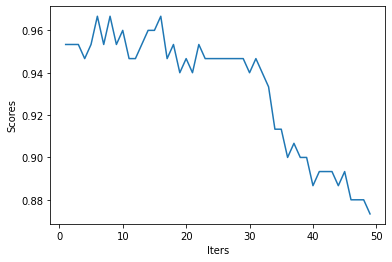

In [49]:
plt.plot(k_range,k_scores)
plt.xlabel('Iters')
plt.ylabel('Scores')